In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from modules import *

In [2]:
path = "../data/lineas_completas/REG804.json"

with open(path, 'r') as archivo:
    data = json.load(archivo)
    
print(len(data))

# Desplegamos la estructura de datos para un elemento (listas, diccionaros, n elementos...)
element = data[10]
print_element(element)

155

OBJECTID_VANO_2D: 15

ID_VANO: G_13578475_13578503

LONGITUD_2D: 161.88580930816013

COORDENADA_X_INICIO: 119680.86639999971

COORDENADA_Y_INICIO: 4695388.431299999

COORDENADA_X_FIN: 119842.54320000019

COORDEANDA_Y_FIN: 4695380.207699999

APOYOS: 
- Length of list: 2
    OBJECTID_APOYO_3D: 157
    COD_APOYO: 13578503
    COORDENADA_X: 119680.86639999971
    COORDEANDA_Y: 4695388.431299999
    COORDENADAS_Z: [923.9784999999974, 930.0492999999988]
    - Length of list: 2

CONDUCTORES: 
- Length of list: 3
    OBJECTID_VANO_3D: 631
    LONGITUD_2D: 161.62690508919917
    LONGITUD_3D: 163.754105368576
    VERTICES: [[119842.52759999968, 4695381.5911, 957.5022999999928], [119833.55910000019, 4695382.0328, 955.4238000000041], [119824.59080000035, 4695382.476199999, 953.4251999999979], [119815.62249999959, 4695382.9213, 951.5065000000031], [119806.65429999959, 4695383.368000001, 949.6674999999959], [119797.68620000035, 4695383.816400001, 947.9079999999958], [119788.7182, 4695384.2664, 

In [50]:
for d in data: print(d["OBJECTID_VANO_2D"], d["ID_VANO"])

4 G_13578462_13689863
5 G_13576896_13576897
6 G_13576773_13576897
7 G_13576773_13576774
8 G_13576907_13576908
10 G_13578307_13578514
11 G_13578498_13578512
12 G_13578435_13578450
13 G_13578338_13578340
14 G_13578470_13578521
15 G_13578475_13578503
16 G_13578475_13578516
17 G_13576793_13576873
18 G_13576748_13576812
19 G_13576762_13576801
20 G_13576736_13576740
21 G_13578445_13578497
22 G_13578298_13578310
23 G_13578331_13578405
24 G_13576769_13576858
26 G_13578278_13578317
27 G_13578309_13578415
30 G_13578299_13578463
31 G_13578374_13578463
32 G_13578285_13578315
35 G_13576890_13576891
36 G_13577128_13577129
37 G_13578282_13578382
39 G_13578407_13578444
40 G_13578394_13578435
41 G_13578301_13578439
42 G_13578311_13578407
43 G_13578376_13578412
44 G_13576740_13576792
45 G_13578445_13578523
46 G_13578457_13578461
47 G_13578350_13578460
48 G_13578381_13578405
49 G_13578336_13578432
50 G_13578391_13578409
51 G_13578400_13578433
53 G_13578317_13578332
55 G_13578374_13578375
58 G_13577129_13

In [3]:
cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, 0)

In [4]:
all_extremos = []

for i in range(len(data)):
    
    try:
        cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
    except:
        print_element(data[i])
    
    all_extremos.append(extremos_values)

In [45]:
all_extremos[0][0][2], all_extremos[0][1][2], all_extremos[0][2][0][1]

(117045.1509999996, 4689550.816, 558.4422999999952)

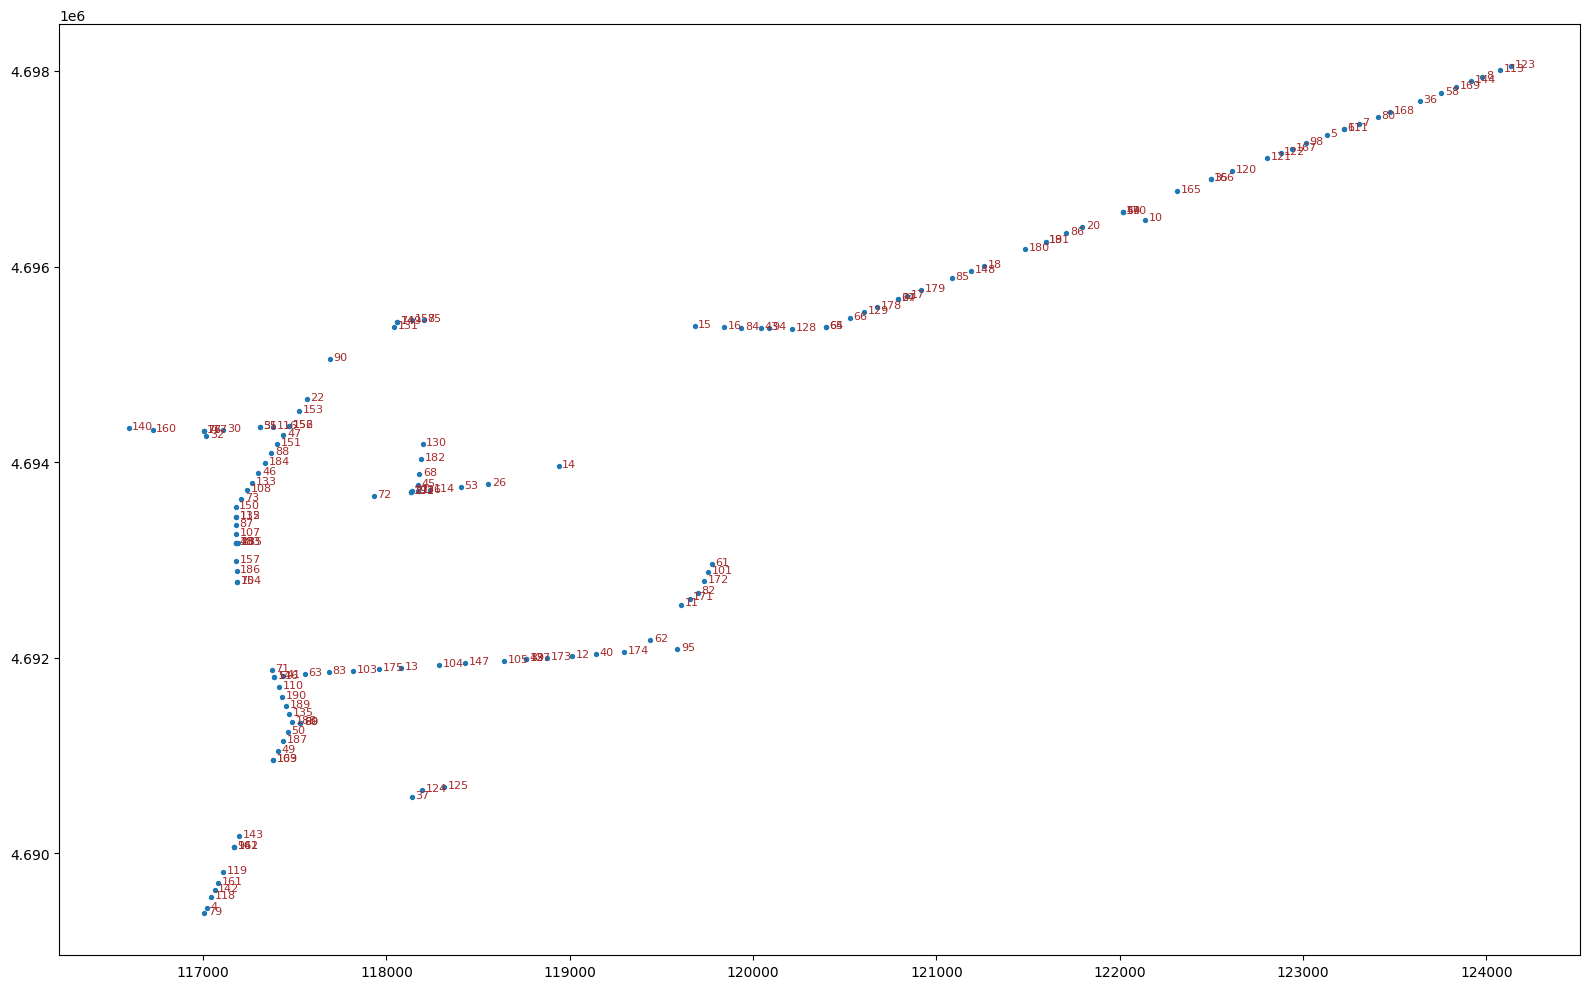

In [67]:
first_extremos = []
last_extremos = []

plt.figure(figsize=(16,10))

for i in range(len(all_extremos)):
    first_extremos.append(np.array([all_extremos[i][0][0], all_extremos[i][1][0], all_extremos[i][2][0][0]]))
    # last_extremos.append(np.array([all_extremos[i][0][2], all_extremos[i][1][2], all_extremos[i][2][0][1]]))
    
first_extremos = np.array(first_extremos)
# last_extremos = np.array(last_extremos)

plt.scatter(first_extremos[:,0], first_extremos[:,1], s = 8)
# plt.scatter(last_extremos[:,0], last_extremos[:,1], s = 3)

for i in range(len(all_extremos)):
    plt.text(first_extremos[i,0]+20, first_extremos[i,1]-10, s = str(data[i]["OBJECTID_VANO_2D"]), size = 8, color = "brown")

plt.tight_layout()

In [57]:
print(extremos_values[0][0], extremos_values[1][0], extremos_values[2][0])
print(extremos_values[0][2], extremos_values[1][2], extremos_values[2][2])

117018.9057 4689441.210200001 547.8000999999931
117045.1509999996 4689550.816 542.3610999999946


In [81]:
distancia(first_extremos[0], first_extremos[1])

9987.441910817477

In [90]:
def distancia(x,y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

all_vecinos_cercanos = []

for extremo1 in first_extremos:
    
    sorted_vecinos = sorted(first_extremos, key=lambda x: distancia(x, extremo1), reverse=False)
    
    # eliminamos el primero porque es él mismo
    vecinos_cercanos = sorted_vecinos[1:6]
        
    # print(sorted_vecinos, "\n", distancia(sorted_vecinos[0], extremo1))
    
    all_vecinos_cercanos.append(vecinos_cercanos)
    
all_vecinos_cercanos[0]

[array([1.17007239e+05, 4.68939176e+06, 5.51175900e+02]),
 array([1.17045151e+05, 4.68955082e+06, 5.42361100e+02]),
 array([1.17062209e+05, 4.68962258e+06, 5.43063200e+02]),
 array([1.17079453e+05, 4.68969512e+06, 5.43428400e+02]),
 array([1.17107596e+05, 4.68981417e+06, 5.43882300e+02])]

In [54]:
dx = (extremos[0][0]-extremos[2][0])
dy = (extremos[0][1]-extremos[2][1])

In [55]:
np.sqrt((extremos[0][0]-extremos[2][0])**2 + (extremos[0][1]-extremos[2][1])**2)

112.70424643956059